# Data Preprocessing

Описание данных. 
- Имеем 4 переменных. 
- независимые: направление ветра (Wind_direction), давление (Pressure), влажность (Humidity); 
- зависимая прогнозируемая переменная - температура. Поместим ее в конец документа 
- Конвертируем документ из .xlsx в .csv
- осуществим подготовку данных. 
- Импортируем библиотеки, загрузим файл с данными.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('Control-1.csv', sep=',')

Выведем данные на экран. Имеем 4 столбца, 3337 строк.

In [3]:
df

,Wind_direction,Pressure,Humidity,Temperature
0,268.4,914.7,75.7,3.7
1,119.1,914.4,75.1,3.5
2,118.9,915.4,74.8,3.1
3,114.9,914.5,73.0,3.3
4,107.6,914.9,72.8,3.3
...,...,...,...,...
3332,294.6,888.0,72.4,-3.3
3333,292.3,897.8,70.9,-3.2
3334,292.2,910.6,70.3,-3.0
3335,278.7,929.0,74.2,-3.2


Проверим типы данных по переменным для выявления соответствий.

In [4]:
df.dtypes

Wind_direction    float64
Pressure          float64
Humidity          float64
Temperature       float64
dtype: object

- Построим графики распределения функций. 
- Поведем логарифмирование данных

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


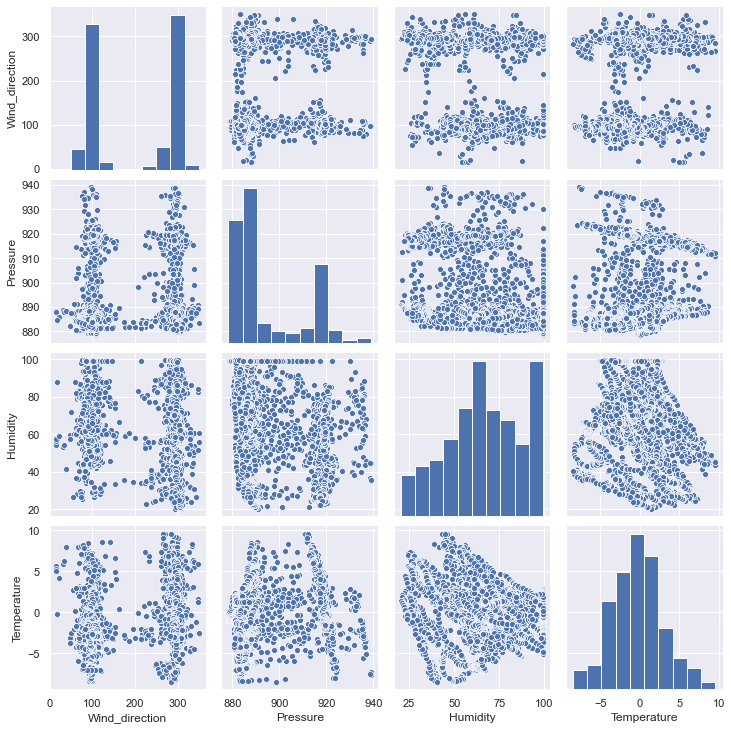

In [5]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Произведем преобразование для искаженных распределений и продемонстрируем результат.

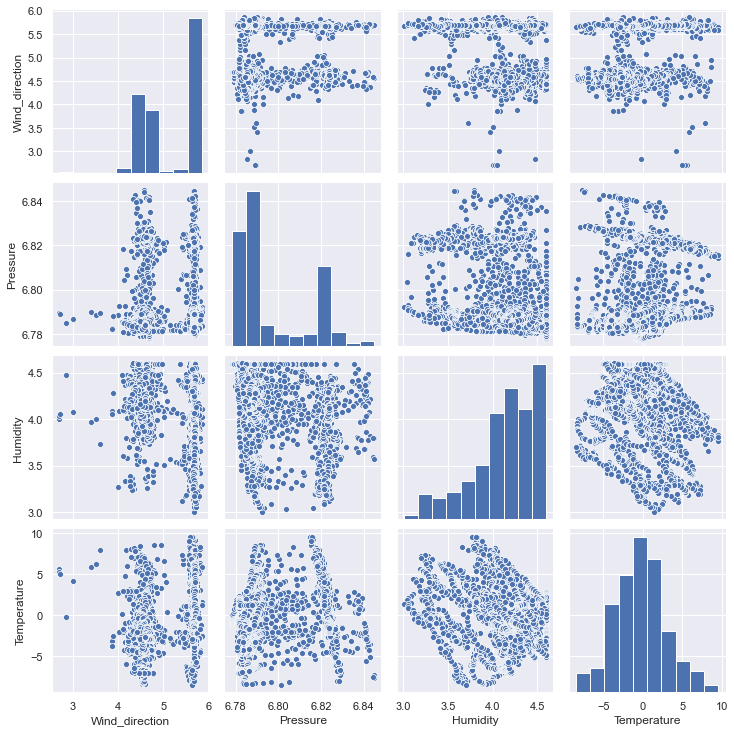

In [6]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['Wind_direction','Pressure','Humidity']] = np.log(df_1[['Wind_direction','Pressure','Humidity']])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

Выведем статистику по числовым переменным для нахождения переменных с пропущенными значениями. Как видим, пропущенных значений нет.

In [7]:
df.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,3337.000000,3337.000000,3337.000000,3337.000000
mean,197.319898,895.010219,66.823644,-0.286365
std,98.967935,15.333217,21.408989,3.253623
min,14.900000,878.300000,20.200000,-8.500000
25%,96.900000,883.900000,52.400000,-2.700000
50%,257.200000,887.300000,66.100000,-0.300000
75%,294.400000,913.500000,83.400000,1.700000
max,349.900000,939.000000,99.400000,9.600000


- Осуществим работы с выбросами в числовых переменных
- применим функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [8]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

- Запишем в наш датасет уже очищенные от  выбросов переменные и выведем статистику повторно
- В результате выполнения очистки наблюдаем, что максимальное, минимальное, среднее значения и стандартное отклонение не изменились и соответствуют нормальному распределению. 
- Это говорит об отсутствии выбросов.

In [9]:
# Outliers
df = outliers(df)
df.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,3337.000000,3337.000000,3337.000000,3337.000000
mean,197.319898,895.010219,66.823644,-0.286426
std,98.967935,15.333217,21.408989,3.253441
min,14.900000,878.300000,20.200000,-8.500000
25%,96.900000,883.900000,52.400000,-2.700000
50%,257.200000,887.300000,66.100000,-0.300000
75%,294.400000,913.500000,83.400000,1.700000
max,349.900000,939.000000,99.400000,9.474505


- Поиске пропущеных значений. 
- Выведем общее количество и процент пропусков по переменным. 
- Пропуски отсутствуют.

In [10]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Temperature,0,0.0
Humidity,0,0.0
Pressure,0,0.0
Wind_direction,0,0.0


Мы получаем подготовленный набор данных, который можно использовать для  дальнешего моделирования.

# Linear Regression

- Следующий этап нашей работы будет состоять в построении многофакторной линейной регрессии. 
- Построим корреляционную матрицую Данная матрица необходима для визуализации и выявления наиболее значимых факторов, которые необходимо будет включить в модель.
- Как можно определить изначально, большее влияние имеет переменная Wind_direction, потом Pressure и потом Humidity.

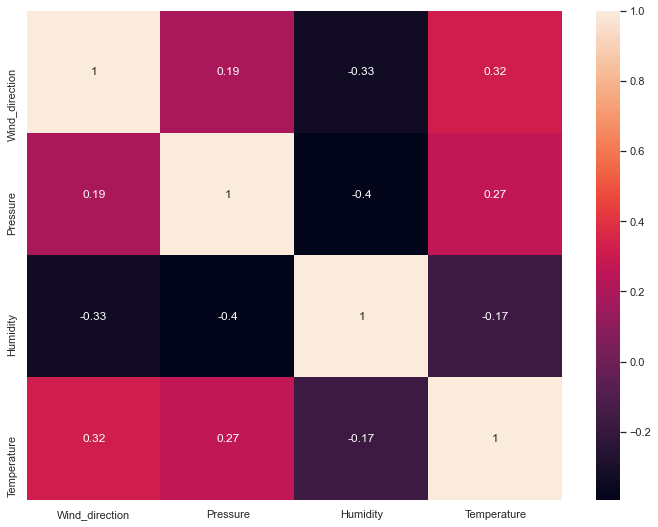

In [11]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Разделим выборку на обучающую и тестовую (20%), запишем разделенные данные.

In [12]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Построим модель многофакторной регрессии от всех переменных, включив константу. Выведем статистику по ней.

In [13]:
# Multiple Linear Regression, checking p-values
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     136.3
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           3.92e-82
Time:                        12:06:52   Log-Likelihood:                -6780.4
No. Observations:                2669   AIC:                         1.357e+04
Df Residuals:                    2665   BIC:                         1.359e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.1231      3.857    -11.180      0.000     -50.686     -35.560
x1             0.0089      0.001     13.851      0.000       0.008       0.010
x2             0.0457      0.004     10.826      0.000       0.037       0.054
x3             0.0022      0.003      0.697      0.486      -0.004       0.008
==============================================================================
Omnibus:                       15.820   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.928
Skew:                           0.129   Prob(JB):                     0.000128
Kurtosis:                       3.308   Cond. No.                     5.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Как показала статистика, переменные модели Х1 и Х2 оказались значимыми. 
- Переменнаяя Х3 превышает порог в 3%. Коэффициент детерминации низкий, однако модель можно считать значимой.
- При исключении данной незначимой переменной значение R^2 оставалось равным 0,133. 
- Для нашей модели оставим все три фактора.

In [14]:
X_train = X_train[:, [0, 1, 2]]
X_test = X_test[:,[0, 1 ,2] ]

In [15]:
# Fitting Optimized Multiple Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

Получаем коэффициенты регрессии

In [16]:
# Getting parameters
mr.coef_, mr.intercept_

(array([0.00888081, 0.04573761, 0.00218375]), -43.12305474544678)

Строим прогноз на тестовых значениях:

In [17]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

Вычисляем коэффициент детерминации. Видим, что на тестовых значениях он немного выше.

In [18]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.1329919873543104, 0.20574212261659275)

Находим среднеквадратическое отклонение, которое на тестовых значениях немного ниже. Это означаает то, что модель немного переобучилась.

In [19]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(9.421508944200651, 7.500016224794089)

Строим график по наиболее значимой переменной для визуализации результата. Видим, функция предсказания работает но не очень удачно.

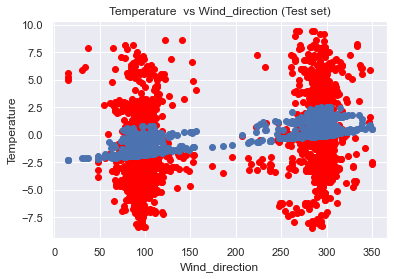

In [20]:
# Visualising the train set results
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train[:,0], mr.predict(X_train), 'bo')
plt.title('Temperature  vs Wind_direction (Test set)')
plt.xlabel('Wind_direction')
plt.ylabel('Temperature')
plt.show()

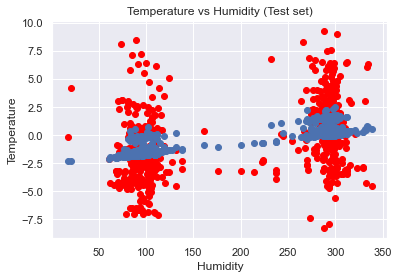

In [21]:
# Visualising the Test set results
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], mr.predict(X_test), 'bo')
plt.title('Temperature vs Wind_direction (Test set)')
plt.xlabel('Wind_direction')
plt.ylabel('Temperature')
plt.show()

Итак, мы получили базовую модель, от которой мы будем отталкиваться и ориентирваться в ходе посроения модели нейронной сети. Сохраним данные, полученные на данном этапе, для последующей работы с ними.

In [23]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('Control-1_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

# Regression Neural Network

Импортируем подготовленные данные из сохраненого файла. Переносим в переменные соответствующие записи.

In [24]:
# Importing prepared dataset
import pickle
input = open('Control-1_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Произведем шкалирование данных. Использя выборку train оценим параметры. Преобразуем обучающую и тестовую выборки.

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

Подключим библиотеки, необходимые для работы с нейронными сетями.

In [26]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

- создаем последовательную нейронную сеть: 
- размерность входного слоя будет равна 3, т.к. в предыдущей модели три переменных, 
- число нейронов на выходном слое задаем равным 7, так как модель расширяющаяся.
- На втором слое количество нейронов оставляем равным 7
- На последнем слое используем линейную функцию активации.

In [27]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(units = 7, activation = 'tanh', input_dim = 3))

# Adding the second hidden layer
rnn.add(Dense(units = 7, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Обучаем модель партиями по 10 объектов в течении 100 эпох.

In [28]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
267/267 [==============================] - 0s 457us/step - loss: 0.8709 - accuracy: 0.0000e+00
Epoch 2/100
267/267 [==============================] - 0s 487us/step - loss: 0.8490 - accuracy: 0.0000e+00
Epoch 3/100
267/267 [==============================] - 0s 450us/step - loss: 0.8359 - accuracy: 0.0000e+00
Epoch 4/100
267/267 [==============================] - 0s 494us/step - loss: 0.8251 - accuracy: 0.0000e+00
Epoch 5/100
267/267 [==============================] - 0s 461us/step - loss: 0.8160 - accuracy: 0.0000e+00
Epoch 6/100
267/267 [==============================] - 0s 480us/step - loss: 0.8029 - accuracy: 0.0000e+00
Epoch 7/100
267/267 [==============================] - 0s 476us/step - loss: 0.7937 - accuracy: 0.0000e+00
Epoch 8/100
267/267 [==============================] - 0s 472us/step - loss: 0.7817 - accuracy: 0.0000e+00
Epoch 9/100
267/267 [==============================] - 0s 453us/step - loss: 0.7699 - accuracy: 0.0000e+00
Epoch 10/100
267/267 [===============

Epoch 77/100
267/267 [==============================] - 0s 457us/step - loss: 0.6470 - accuracy: 0.0000e+00
Epoch 78/100
267/267 [==============================] - 0s 453us/step - loss: 0.6494 - accuracy: 0.0000e+00
Epoch 79/100
267/267 [==============================] - 0s 435us/step - loss: 0.6491 - accuracy: 0.0000e+00
Epoch 80/100
267/267 [==============================] - 0s 431us/step - loss: 0.6466 - accuracy: 0.0000e+00
Epoch 81/100
267/267 [==============================] - 0s 476us/step - loss: 0.6465 - accuracy: 0.0000e+00
Epoch 82/100
267/267 [==============================] - 0s 494us/step - loss: 0.6469 - accuracy: 0.0000e+00
Epoch 83/100
267/267 [==============================] - 0s 502us/step - loss: 0.6471 - accuracy: 0.0000e+00
Epoch 84/100
267/267 [==============================] - 0s 498us/step - loss: 0.6421 - accuracy: 0.0000e+00
Epoch 85/100
267/267 [==============================] - 0s 513us/step - loss: 0.6462 - accuracy: 0.0000e+00
Epoch 86/100
267/267 [======

Строим прогноз на тестовом множестве.

In [29]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

Осуществляем обратное шкалирование

In [30]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

Вычмслим сумму квадратов ошибок на тестовом множестве.

In [31]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

5.412128483471572

Видим, что MSE в модели нейронной сети (5.412128483471572) значительно сократилась по сравнения с моделью регрессии (7.500016224794089).

Построим график, на котором видно, что построенная модель нейронной сети сработала довольно четко по сравнению с многофакторной регрессией.

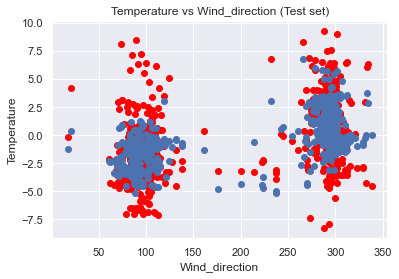

In [32]:
# Visualising the Test set results
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], y_hat, 'bo')
plt.title('Temperature vs Wind_direction (Test set)')
plt.xlabel('Wind_direction')
plt.ylabel('Temperature')
plt.show()

В итоге получим более качественный результат по сравнению с моделью регрессии.